## Seminar 01: Dealing with Word Embeddings

Seminar from girafe ai ml course

Today we gonna play with word embeddings: train our own little embedding, load one from   gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of embedding dataset.

__Requirements:__ if you're running locally, in the selected environment run the following command:

```pip install --upgrade nltk gensim bokeh umap-learn```


In [ ]:
!pip install umap-learn

In [ ]:
!pip install --upgrade nltk gensim bokeh umap-learn

In [ ]:
import itertools
import string

import numpy as np
import umap.umap_ as umap
from nltk.tokenize import WordPunctTokenizer

from matplotlib import pyplot as plt

from IPython.display import clear_output

In [9]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt -nc
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2023-01-20 02:01:15--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2023-01-20 02:01:15--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc75fca7c05b4818ed8aa996c9c3.dl.dropboxusercontent.com/cd/0/get/B04s0XJ63Lb0eDpOVM7dgP_AAebSV7WTJgGhTPHFiGAu3Wi0FdfZ_W4JXfam1_6p-yfxuIQSDbexXBiFIOj_pYAGh0puuMYtSi1sjawTANB3eKAhaYlKWAwDUQxSLUlfMkA30wHFqukhaZs1WWnYP0g3E-QuY6kNkDz_F76TsdkBKA/file?dl=1# [following]
--2023-01-20 02:01:15--  https://uc75fca7c05b4818ed8aa996c9c3.dl.dropboxusercontent.com/cd/0/get/B04s0XJ63Lb0eDpOVM7dgP_AAebSV7WTJgGhTPHFiGAu3Wi0FdfZ_W4JXfam1_6p-yfxuIQSDbexXBiFIOj_pYA

In [35]:
data = list(open("./quora.txt", encoding="utf-8"))
data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an nlp task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and smiles attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many nlp tasks like tokenization, stemming or part-of-speech tagging.

In [36]:
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [51]:
# TASK: lowercase everything and extract tokens with tokenizer. 
# data_tok should be a list of lists of tokens for each line in data.

data_tok = [tokenizer.tokenize(d.lower()) for d in data]

Let's peek at the result:

In [10]:
' '.join(data_tok[0])

"can i get back with my ex even though she is pregnant with another guy ' s baby ?"

Small check that everything is alright

In [13]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

__Word vectors:__ as the saying goes, there's more than one way to train word embeddings. There's Word2Vec and GloVe with different objective functions. Then there's fasttext that uses character-level models to train word embeddings. 

The choice is huge, so let's start someplace small: __gensim__ is another NLP library that features many vector-based models incuding word2vec.

In [14]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok, 
                 size=32,      # embedding vector size
                 min_count=5,  # consider words that occured at least 5 times
                 window=5).wv  # define context as a 5-word window around the target word

In [15]:
# now you can get word vectors !
model.get_vector('anything')

array([-1.9159902 ,  1.6181865 , -1.9428873 , -1.707963  , -0.1230197 ,
       -1.1740458 , -3.3919022 ,  0.49821842,  1.1838397 ,  0.9704194 ,
        3.5570827 , -2.9983575 ,  3.0075428 , -2.6698282 , -0.03392489,
       -1.6998826 ,  0.8000243 , -2.6497092 , -2.9414248 , -1.9903481 ,
        3.6984293 , -0.11911155,  0.27625585, -0.8282491 , -2.7002313 ,
        0.49844107, -1.5767941 ,  0.278234  , -1.0212743 , -1.3230236 ,
       -2.7814624 , -1.5735484 ], dtype=float32)

In [16]:
# or query similar words directly. Go play with it!
model.most_similar('bread')

[('rice', 0.956649899482727),
 ('cheese', 0.936771035194397),
 ('butter', 0.9195572733879089),
 ('honey', 0.9154198169708252),
 ('corn', 0.9149532914161682),
 ('fruit', 0.9131504893302917),
 ('garlic', 0.9130954742431641),
 ('sauce', 0.9125885963439941),
 ('vodka', 0.9118829965591431),
 ('noodles', 0.9117988348007202)]

## What is GloVe?

 Nearest neighbors

The Euclidean distance (or cosine similarity) between two word vectors provides an effective method for measuring the linguistic or semantic similarity of the corresponding words. Sometimes, the nearest neighbors according to this metric reveal rare but relevant words that lie outside an average human's vocabulary. For example, here are the closest words to the target word frog:
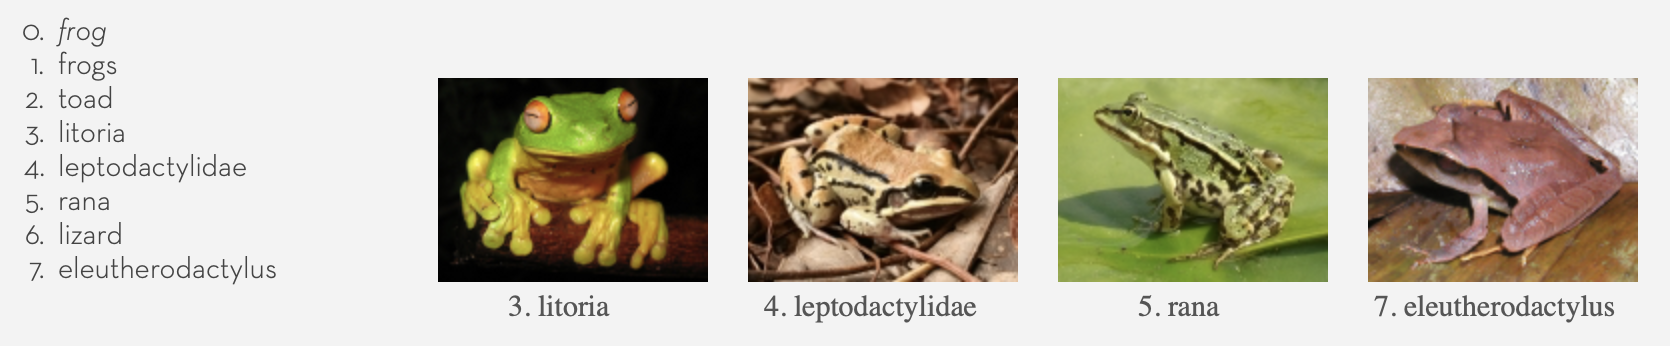


The similarity metrics used for nearest neighbor evaluations produce a single scalar that quantifies the relatedness of two words. This simplicity can be problematic since two given words almost always exhibit more intricate relationships than can be captured by a single number. For example, man may be regarded as similar to woman in that both words describe human beings; on the other hand, the two words are often considered opposites since they highlight a primary axis along which humans differ from one another.

In order to capture in a quantitative way the nuance necessary to distinguish man from woman, it is necessary for a model to associate more than a single number to the word pair. 

A natural and simple candidate for an enlarged set of discriminative numbers is the vector difference between the two word vectors. GloVe is designed in order that such vector differences capture as much as possible the meaning specified by the juxtaposition of two words.

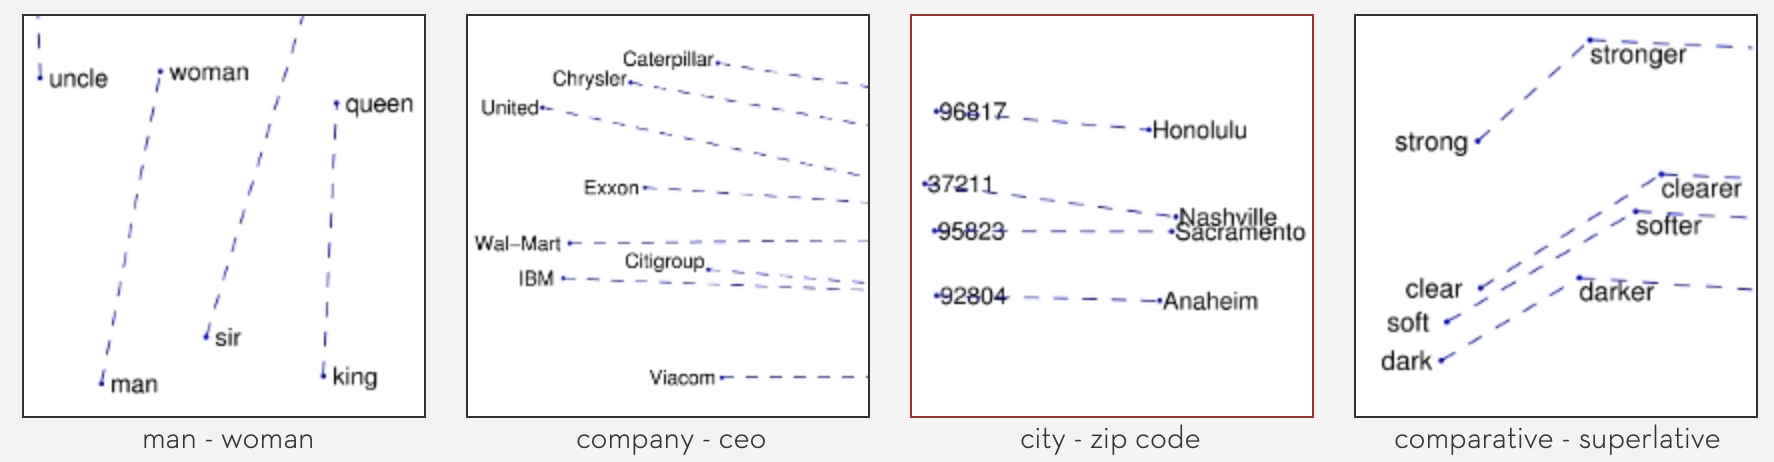

The GloVe model is trained on the non-zero entries of a global word-word co-occurrence matrix, which tabulates how frequently words co-occur with one another in a given corpus. Populating this matrix requires a single pass through the entire corpus to collect the statistics. For large corpora, this pass can be computationally expensive, but it is a one-time up-front cost. Subsequent training iterations are much faster because the number of non-zero matrix entries is typically much smaller than the total number of words in the corpus.
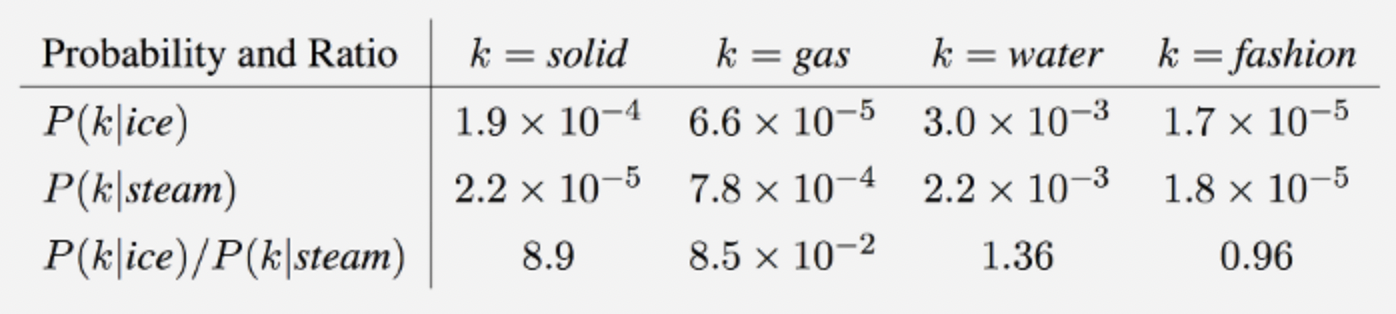

### Using pre-trained model

Took it a while, huh? Now imagine training life-sized (100~300D) word embeddings on gigabytes of text: wikipedia articles or twitter posts. 

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code (no sms required, promise).

In [1]:
import gensim.downloader as api
model = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [2]:
model.most_similar(positive=["coder", "money"], negative=["brain"])

[('realtor', 0.8265186548233032),
 ('gfx', 0.8249695897102356),
 ('caterers', 0.798202395439148),
 ('beatmaker', 0.7936854362487793),
 ('recruiter', 0.7892400622367859),
 ('sfi', 0.784467339515686),
 ('sosh', 0.7840631604194641),
 ('promoter', 0.7838252186775208),
 ('smallbusiness', 0.7786215543746948),
 ('promoters', 0.7764680981636047)]

### Visualizing word vectors

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.

Let's use that to plot 1000 most frequent words

In [3]:
words = sorted(model.vocab.keys(), 
               key=lambda word: model.vocab[word].count,
               reverse=True)[:1000]

print(words[::100])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [13]:
# for each word, compute it's vector with model
word_vectors = np.array([model.get_vector(word) for word in words])

In [14]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words), 25)
assert np.isfinite(word_vectors).all()

In [15]:
word_vectors.shape

(1000, 25)

#### Linear projection: PCA

The simplest linear dimensionality reduction method is __P__rincipial __C__omponent __A__nalysis.

In geometric terms, PCA tries to find axes along which most of the variance occurs. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">


Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - object matrix (**centered**);
- $W \in \mathbb{R}^{m \times d}$ - matrix of direct transformation;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - matrix of reverse transformation;
- $n$ samples, $m$ original dimensions and $d$ target dimensions;



In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
# map word vectors onto 2d plane with PCA. Use good old sklearn api (fit, transform)
# after that, normalize vectors to make sure they have zero mean and unit variance
word_vectors_pca = pca.fit_transform(word_vectors)
def norming(x):
  n = np.linalg.norm(x)
  return x / n

word_vectors_pca = np.array(list(map(norming, word_vectors_pca)))
word_vectors_pca = (word_vectors_pca - word_vectors_pca.mean(0)) / word_vectors_pca.std(0)

array([0.99999976, 0.9999999 ], dtype=float32)

In [29]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"
assert max(abs(word_vectors_pca.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - word_vectors_pca.std(0))) < 1e-2, "points must have unit variance"

#### Let's draw it!

In [30]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [31]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

Figure(id='1003', ...)

### Visualizing neighbors with UMAP
PCA is nice but it's strictly linear and thus only able to capture coarse high-level structure of the data.

If we instead want to focus on keeping neighboring points near, we could use UMAP, which is itself an embedding method. Here you can read __[more on UMAP (ru)](https://habr.com/ru/company/newprolab/blog/350584/)__ and on __[t-SNE](https://distill.pub/2016/misread-tsne/)__, which is also an embedding.

In [32]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(word_vectors) # преобразовываем

In [33]:
draw_vectors(embedding[:, 0], embedding[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

Figure(id='1112', ...)

### Visualizing phrases

Word embeddings can also be used to represent short phrases. The simplest way is to take __an average__ of vectors for all tokens in the phrase with some weights.

This trick is useful to identify what data are you working with: find if there are any outliers, clusters or other artefacts.

Let's try this new hammer on our data!


In [37]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    
    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_tokenized = tokenizer.tokenize(phrase.lower())
    phrase_vectors = [model[x] for x in phrase_tokenized if x in model.vocab.keys()]

    if len(phrase_vectors) != 0:
        vector = np.mean(phrase_vectors, axis=0)

    # YOUR CODE
    
    return vector
        
    

In [38]:
get_phrase_embedding(data[402687])

array([-0.18204999,  0.30953574,  0.20861094,  0.07982156, -0.22565515,
       -0.33001748,  1.2495784 ,  0.13134292, -0.33788875,  0.06196944,
       -0.231793  ,  0.09389219, -4.9685497 , -0.23611419, -0.32609668,
       -0.092073  ,  0.4407505 , -0.75413746, -0.5389092 , -0.184752  ,
        0.07867809,  0.20018655, -0.16202375,  0.30375698, -0.41255665],
      dtype=float32)

In [39]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...")

In [40]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data[::len(data) // 1000]

# compute vectors for chosen phrases and turn them to numpy array
phrase_vectors = np.asarray([get_phrase_embedding(x) for x in chosen_phrases]) 

In [41]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [44]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = umap.UMAP(n_neighbors=3).fit_transform(phrase_vectors) # преобразовываем

phrase_vectors_2d = (phrase_vectors_2d - phrase_vectors_2d.mean(axis=0)) / phrase_vectors_2d.std(axis=0)

In [45]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

Figure(id='1363', ...)

Finally, let's build a simple "similar question" engine with phrase embeddings we've built.

In [52]:
# compute vector embedding for all lines in data
data_vectors = np.vstack([get_phrase_embedding(l) for l in data])
data_vectors[0]

array([-0.20129159,  0.2800847 ,  0.20248146, -0.06290309, -0.13497119,
        0.00861136,  1.0769757 ,  0.28034085, -0.48734117,  0.22369643,
       -0.21113858,  0.33287612, -4.8430424 , -0.35945612, -0.11689067,
        0.06346285,  0.25226158, -0.48065656, -0.5097486 , -0.159933  ,
        0.17304395,  0.2680475 ,  0.10165835,  0.13623685, -0.2027976 ],
      dtype=float32)

In [47]:
norms = np.linalg.norm(data_vectors, axis=1)

In [48]:
printable_set = set(string.printable)

In [49]:
data_subset = [x for x in data if set(x).issubset(printable_set)]

In [59]:
a1 = get_phrase_embedding("How do i enter the matrix?")

In [60]:
a2 = get_phrase_embedding("How do I get to the dark web?\n")

In [80]:
a = np.array([1,2,3,4])
a[np.argsort(a)[:2]]

array([1, 2])

In [117]:
np.array(data)[[392815, 0]]

array(['How do you print the gridlines in Excel 2003?\n',
       "Can I get back with my ex even though she is pregnant with another guy's baby?\n"],
      dtype='<U1170')

In [118]:
def find_nearest(query, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    hint: it's okay to use global variables: data and data_vectors. see also: np.argpartition, np.argsort
    """
    
    vq = get_phrase_embedding(query)
    inds = np.argsort([1-np.dot(vq, x)/(np.linalg.norm(vq) * np.linalg.norm(x)) for x in data_vectors])
    out = np.array(data)[inds[:k]]

    return out

In [119]:
results = find_nearest(query="How do i enter the matrix?", k=10)

print(''.join(results))

assert len(results) == 10 and isinstance(results[0], str)
assert results[0] == 'How do I get to the dark web?\n'
# assert results[3] == 'What can I do to save the world?\n'

<ipython-input-118-e3dfcc803eeb>:9: RuntimeWarning: invalid value encountered in float_scalars
  inds = np.argsort([1-np.dot(vq, x)/(np.linalg.norm(vq) * np.linalg.norm(x)) for x in data_vectors])


How do I get to the dark web?
What universal remote do I need and how do I set it up to a Blaupunkt TV?
How do I connect the ASUS_T00Q to my PC?
How do you print the gridlines in Excel 2007?
How do you print the gridlines in Excel 2003?
How do you print the gridlines in Excel 2010?
I would like to create a new website. What do I have to do?
How do I get the new Neko Atsume wallpapers? How do they work?
I want to experience the 4G network. Do I need to change my SIM card from 3G to 4G?
What do I have to do to sell my photography?



In [120]:
find_nearest(query="How does Trump?", k=10)

<ipython-input-118-e3dfcc803eeb>:9: RuntimeWarning: invalid value encountered in float_scalars
  inds = np.argsort([1-np.dot(vq, x)/(np.linalg.norm(vq) * np.linalg.norm(x)) for x in data_vectors])


array(['What does Donald Trump think about Israel?\n',
       'Who or what is Donald Trump, really?\n',
       'Donald Trump: Why are there are so many questions about Donald Trump on Quora?\n',
       'Does anyone like Trump and Clinton?\n',
       'What does Cortana mean?\n',
       'Did Bill Gates outcompete and outsmart IBM? Why? How?\n',
       'Why and how is Bill Gates so rich?\n',
       'What does Donald Trump think about Pakistan?\n',
       'What do you think about Trump and Obama?\n',
       'Who and what is Quora?\n'], dtype='<U1170')

In [121]:
find_nearest(query="Why don't i ask a question myself?", k=10)

<ipython-input-118-e3dfcc803eeb>:9: RuntimeWarning: invalid value encountered in float_scalars
  inds = np.argsort([1-np.dot(vq, x)/(np.linalg.norm(vq) * np.linalg.norm(x)) for x in data_vectors])


array(["Why don't my parents listen to me?\n",
       "Why don't people appreciate me?\n",
       "Why she don't interact with me?\n", "Why don't I get a date?\n",
       "Why don't I get a girlfriend?\n",
       "Why don't I have a girlfriend?\n",
       "Why don't I have a boyfriend?\n",
       "Why don't I like people touching me?\n",
       "Why can't I ask a question anonymously?\n",
       "Why don't you use Facebook much?\n"], dtype='<U1170')

In [122]:
from sklearn.cluster import DBSCAN, KMeans

In [123]:
kmeans = KMeans(3)

In [124]:
labels = kmeans.fit_predict(np.asarray(phrase_vectors))

In [125]:
_colors = ['red', 'green', 'blue']

In [126]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1], color=[_colors[l] for l in labels],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

Figure(id='1505', ...)

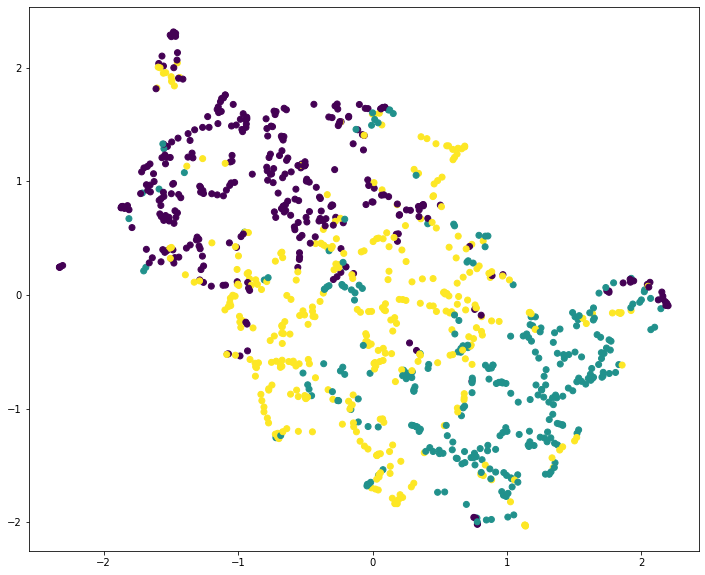

In [127]:
plt.figure(figsize=(12, 10))
plt.scatter(phrase_vectors_2d[:,0], phrase_vectors_2d[:, 1], c=labels.astype(float))

__Now what?__
* Try running TSNE instead of UMAP (it takes a long time)
* Try running UMAP or TSNEon all data, not just 1000 phrases
* See what other embeddings are there in the model zoo: `gensim.downloader.info()`
* Take a look at [FastText](https://github.com/facebookresearch/fastText) embeddings
* Optimize find_nearest with locality-sensitive hashing: use [nearpy](https://github.com/pixelogik/NearPy) or `sklearn.neighbors`.




## Let's do machine translator without deeeeeeeeplearning!


But even without parallel corpora this system can be good enough (hopefully). 

For our system we choose two kindred Slavic languages: Ukrainian and Russian. 

### Feel the difference!

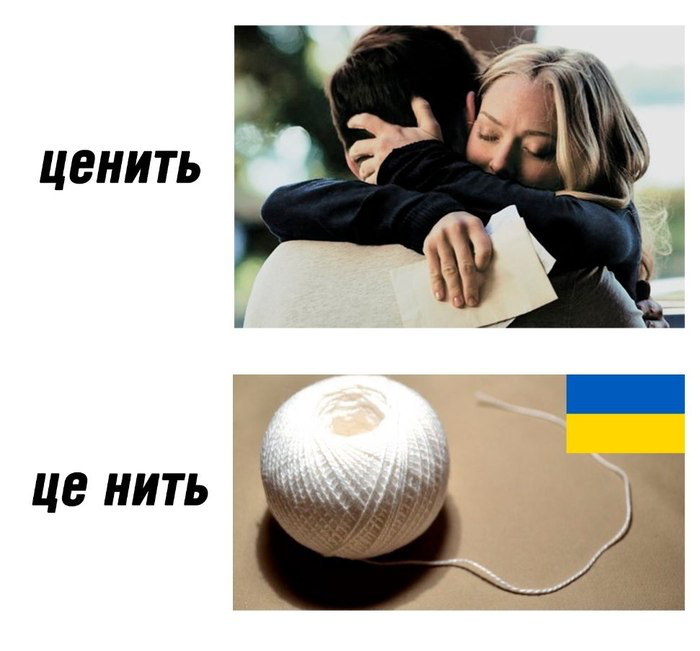

### Frament of the Swadesh list for some slavic languages

The Swadesh list is a lexicostatistical stuff. It's named after American linguist Morris Swadesh and contains basic lexis. This list are used to define subgroupings of languages, its relatedness.

So we can see some kind of word invariance for different Slavic languages.


| Russian         | Belorussian              | Ukrainian               | Polish             | Czech                         | Bulgarian            |
|-----------------|--------------------------|-------------------------|--------------------|-------------------------------|-----------------------|
| женщина         | жанчына, кабета, баба    | жінка                   | kobieta            | žena                          | жена                  |
| мужчина         | мужчына                  | чоловік, мужчина        | mężczyzna          | muž                           | мъж                   |
| человек         | чалавек                  | людина, чоловік         | człowiek           | člověk                        | човек                 |
| ребёнок, дитя   | дзіця, дзіцёнак, немаўля | дитина, дитя            | dziecko            | dítě                          | дете                  |
| жена            | жонка                    | дружина, жінка          | żona               | žena, manželka, choť          | съпруга, жена         |
| муж             | муж, гаспадар            | чоловiк, муж            | mąż                | muž, manžel, choť             | съпруг, мъж           |
| мать, мама      | маці, матка              | мати, матір, неня, мама | matka              | matka, máma, 'стар.' mateř    | майка                 |
| отец, тятя      | бацька, тата             | батько, тато, татусь    | ojciec             | otec                          | баща, татко           |
| много           | шмат, багата             | багато                  | wiele              | mnoho, hodně                  | много                 |
| несколько       | некалькі, колькі         | декілька, кілька        | kilka              | několik, pár, trocha          | няколко               |
| другой, иной    | іншы                     | інший                   | inny               | druhý, jiný                   | друг                  |
| зверь, животное | жывёла, звер, істота     | тварина, звір           | zwierzę            | zvíře                         | животно               |
| рыба            | рыба                     | риба                    | ryba               | ryba                          | риба                  |
| птица           | птушка                   | птах, птиця             | ptak               | pták                          | птица                 |
| собака, пёс     | сабака                   | собака, пес             | pies               | pes                           | куче, пес             |

In [128]:
import gensim
from gensim.models import KeyedVectors

Download

Ukranian https://disk.yandex.ru/d/9CAeNsJiInoyUA

Russian https://disk.yandex.ru/d/3yG0-M4M8fypeQ

In [129]:
uk_emb = KeyedVectors.load_word2vec_format("cc.uk.300.vec")
uk_emb = KeyedVectors.load_word2vec_format("cc.uk.300.vec")

FileNotFoundError: ignored

In [ ]:
ru_emb.most_similar([ru_emb["август"]], topn=10)

In [ ]:
uk_emb.most_similar([uk_emb["серпень"]])

In [ ]:
ru_emb.most_similar([uk_emb["серпень"]])

In [ ]:
uk_emb.most_similar([uk_emb["серпень"]])

In [ ]:
def load_word_pairs(filename):
    uk_ru_pairs = []
    uk_vectors = []
    ru_vectors = []
    with open(filename, "r") as inpf:
        for line in inpf:
            uk, ru = line.rstrip().split("\t")
            if uk not in uk_emb or ru not in ru_emb:
                continue
            uk_ru_pairs.append((uk, ru))
            uk_vectors.append(uk_emb[uk])
            ru_vectors.append(ru_emb[ru])
    return uk_ru_pairs, np.array(uk_vectors), np.array(ru_vectors)

In [ ]:
uk_ru_train, X_train, Y_train = load_word_pairs("ukr_rus.train.txt")

In [ ]:
uk_ru_test, X_test, Y_test = load_word_pairs("ukr_rus.test.txt")

## Embedding space mapping

Let $x_i \in \mathrm{R}^d$ be the distributed representation of word $i$ in the source language, and $y_i \in \mathrm{R}^d$ is the vector representation of its translation. Our purpose is to learn such linear transform $W$ that minimizes euclidian distance between $Wx_i$ and $y_i$ for some subset of word embeddings. Thus we can formulate so-called Procrustes problem:

$$W^*= \arg\min_W \sum_{i=1}^n||Wx_i - y_i||_2$$
or
$$W^*= \arg\min_W ||WX - Y||_F$$

where $||*||_F$ - Frobenius norm.

In Greek mythology, Procrustes or "the stretcher" was a rogue smith and bandit from Attica who attacked people by stretching them or cutting off their legs, so as to force them to fit the size of an iron bed. We make same bad things with source embedding space. Our Procrustean bed is target embedding space.
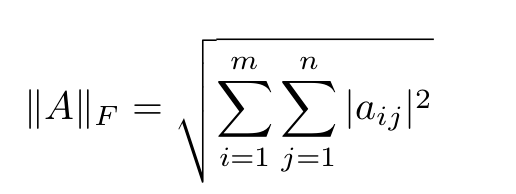

![embedding_mapping.png](https://github.com/yandexdataschool/nlp_course/raw/master/resources/embedding_mapping.png)

But wait...$W^*= \arg\min_W \sum_{i=1}^n||Wx_i - y_i||_2$ looks like simple multiple linear regression (without intercept fit). So let's code.

In [ ]:
from sklearn.linear_model import LinearRegression

# YOUR CODE HERE


Let's take a look at neigbours of the vector of word _"серпень"_ (_"август"_ in Russian) after linear transform.

In [ ]:
august = mapping.predict(uk_emb["серпень"].reshape(1, -1))
ru_emb.most_similar(august)

In [ ]:
def precision(pairs, mapped_vectors, topn=1):
    """
    :args:
        pairs = list of right word pairs [(uk_word_0, ru_word_0), ...]
        mapped_vectors = list of embeddings after mapping from source embedding space to destination embedding space
        topn = the number of nearest neighbours in destination embedding space to choose from
    :returns:
        precision_val, float number, total number of words for those we can find right translation at top K.
    """
    assert len(pairs) == len(mapped_vectors)
    num_matches = 0
    for i, (_, ru) in enumerate(pairs):
        # YOUR CODE HERE
       


In [ ]:
assert precision([("серпень", "август")], august, topn=5) == 0.0
assert precision([("серпень", "август")], august, topn=9) == 1.0
assert precision([("серпень", "август")], august, topn=10) == 1.0

In [ ]:
assert precision(uk_ru_test, X_test) == 0.0
assert precision(uk_ru_test, Y_test) == 1.0

In [ ]:
precision_top1 = precision(uk_ru_test, mapping.predict(X_test), 1)
precision_top5 = precision(uk_ru_test, mapping.predict(X_test), 5)

assert precision_top1 >= 0.635
assert precision_top5 >= 0.813